# Programa de Pós-graduação em Recursos Hídricos e Sanemento - PPGRHS
## Hidrologia

**Balanço Hídrico**

Clebson Farias

In [9]:
import pandas as pd
import numpy as np
import plotly as py
import matplotlib.pyplot as plt

In [2]:
time = ["01/08/13 10:00 PM", "01/08/13 11:00 PM", "01/09/13 12:00 AM", 
        "01/09/13 01:00 AM", "01/09/13 02:00 AM", "01/09/13 03:00 AM", 
        "01/09/13 04:00 AM", "01/09/13 05:00 AM", "01/09/13 06:00 AM",
        "01/09/13 07:00 AM", "01/09/13 08:00 AM", "01/09/13 09:00 AM",
        "01/09/13 10:00 AM", "01/09/13 11:00 AM", "01/09/13 12:00 PM",
        "01/09/13 01:00 PM", "01/09/13 02:00 PM", "01/09/13 03:00 PM",
        "01/09/13 04:00 PM", "01/09/13 05:00 PM", "01/09/13 06:00 PM",
        "01/09/13 07:00 PM", "01/09/13 08:00 PM", "01/09/13 09:00 PM", 
        "01/09/13 10:00 PM", "01/09/13 11:00 PM", "01/10/13 12:00 AM", 
        "01/10/13 01:00 AM", "01/10/13 02:00 AM", "01/10/13 03:00 AM",
        "01/10/13 04:00 AM", "01/10/13 05:00 AM", "01/10/13 06:00 AM",
        "01/10/13 07:00 AM", "01/10/13 08:00 AM", "01/10/13 09:00 AM",
        "01/10/13 10:00 AM", "01/10/13 11:00 AM", "01/10/13 12:00 PM"]
len(time)

39

In [3]:
precipitacao = [0.3, 0.0, 1.8, 7.9, 8.1, 7.1, 5.6, 2.8, 1.8, 4.1, 2.5, 0.8, 0.8, 0.3, 0.5, 0.3, 0.0,
                0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
                0.0, 0.0, 0.0, 0.0, 0.0]
len(precipitacao)

39

In [4]:
vazao = [0.048, 0.095, 0.109, 0.616, 0.700, 12.292, 10.528, 8.960, 5.880, 5.068, 
         4.396, 5.572, 3.808, 2.940, 2.772, 2.128, 1.456, 1.260, 1.008, 0.868, 0.756, 
         0.644, 0.560, 0.504, 0.448, 0.392, 0.336, 0.336, 0.308, 0.269, 0.241, 0.216,
         0.193, 0.174, 0.160, 0.148, 0.129, 0.129, 0.115]
len(vazao)

39

### Dados de precipitação e vazão de uma estação telemétrica para um evento de chuva são mostrado na tabela abaixo.

In [35]:
dados = {"P": precipitacao, "Q": vazao}
dados = pd.DataFrame(dados, index=time)
area = 31.82
dados.head()

,P,Q
01/08/13 10:00 PM,0.3,0.048
01/08/13 11:00 PM,0.0,0.095
01/09/13 12:00 AM,1.8,0.109
01/09/13 01:00 AM,7.9,0.616
01/09/13 02:00 AM,8.1,0.700


#### Mostre como a distribuição de armazenamento se dará assumindo que a bacia passou por um longo período de estiagem antes deste evento(ou seja, **armazenamento inicial é zero**).

#### **Variação de armazenamento**

In [36]:
def armazenamento(dados, so, area):
    fator = 3.6
    s = pd.DataFrame(so + dados.P - ((dados.Q/area) * 3.6), columns=["S"])
    
    return dados.combine_first(s)

dados = armazenamento(dados, 0, area)

#### **Armazenamento Acumulado**

In [37]:
def armazenamento_acumulado(dados):
    s_a = pd.Series(dados.S.cumsum(), name="S_A")
    
    return dados.combine_first(pd.DataFrame(s_a))

dados = armazenamento_acumulado(dados)

In [38]:
dados.head(5)

,P,Q,S,S_A
01/08/13 10:00 PM,0.3,0.048,0.294569,0.294569
01/08/13 11:00 PM,0.0,0.095,-0.010748,0.283821
01/09/13 12:00 AM,1.8,0.109,1.787668,2.071490
01/09/13 01:00 AM,7.9,0.616,7.830308,9.901798
01/09/13 02:00 AM,8.1,0.700,8.020805,17.922602


#### **Total Precipitado e escoado!**

In [39]:
total_P = dados.P.sum()
total_Q = dados.Q.sum()
print("Total Precipitado:", total_P)
print("Total Escoado:", total_Q)

Total Precipitado: 44.7
Total Escoado: 76.562


#### **Total de água que ficou retido na bacia até o final do evento?**

In [40]:
total_S = dados.S_A.max()
print("Total Armazenado:", total_S)

Total Armazenado: 37.242954116907605


#### **Qual o percentual de precipitação que foi escoado?**

### Gráfico variação de armazenamento e armazenamento acumulado:

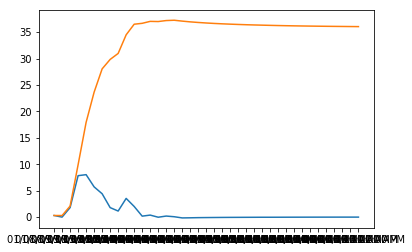

In [41]:
t = dados.index
data1 = dados.S
data2 = dados.S_A

plt.plot(t, data1, data2)
plt.show()

In [42]:
dados.Q = (dados.Q/area)*3.6
dados

,P,Q,S,S_A
01/08/13 10:00 PM,0.3,0.005431,0.294569,0.294569
01/08/13 11:00 PM,0.0,0.010748,-0.010748,0.283821
01/09/13 12:00 AM,1.8,0.012332,1.787668,2.071490
01/09/13 01:00 AM,7.9,0.069692,7.830308,9.901798
01/09/13 02:00 AM,8.1,0.079195,8.020805,17.922602
01/09/13 03:00 AM,7.1,1.390673,5.709327,23.631930
01/09/13 04:00 AM,5.6,1.191100,4.408900,28.040830
01/09/13 05:00 AM,2.8,1.013702,1.786298,29.827128
01/09/13 06:00 AM,1.8,0.665242,1.134758,30.961886
01/09/13 07:00 AM,4.1,0.573375,3.526625,34.488510


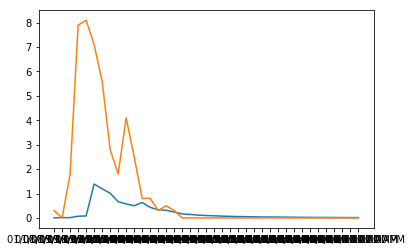

In [43]:
t = dados.index
data_Q = dados.Q
data_P = dados.P

plt.plot(t, data_Q, data_P)
plt.show()